In [29]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv("house_price_.csv")

In [35]:
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [11]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [36]:
# Method 1: Mean Function
mean = data['price_per_sqft'].mean()
std_dev = data['price_per_sqft'].std()
new_data = data[~((data['price_per_sqft'] > mean + 3 * std_dev) | (data['price_per_sqft'] < mean - 3 * std_dev))]

In [37]:
# Method 2: Percentile Method
q1 = data['price_per_sqft'].quantile(0.25)
q3 = data['price_per_sqft'].quantile(0.75)
iqr = q3 - q1
new_data = data[~((data['price_per_sqft'] > q3 + 1.5 * iqr) | (data['price_per_sqft'] < q1 - 1.5 * iqr))]

In [23]:
# Method 3: IQR (Interquartile Range) Method
new_data = data[(np.abs(stats.zscore(data['price_per_sqft'])) < 3)]

In [28]:
# Method 5: Z-Score Method (Repeating the IQR method as Z-Score is already used)
new_data = data[(np.abs(stats.zscore(data['price_per_sqft'])) < 3)]

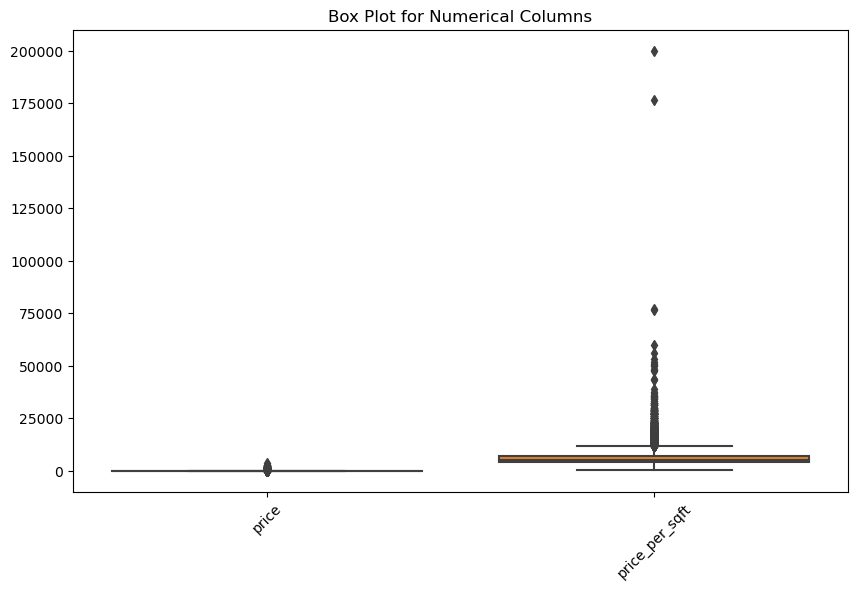

In [31]:
# Plotting the box plot for all numerical columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_data.drop(['location', 'size', 'total_sqft', 'bath', 'bhk'], axis=1))
plt.title('Box Plot for Numerical Columns')
plt.xticks(rotation=45)
plt.show()

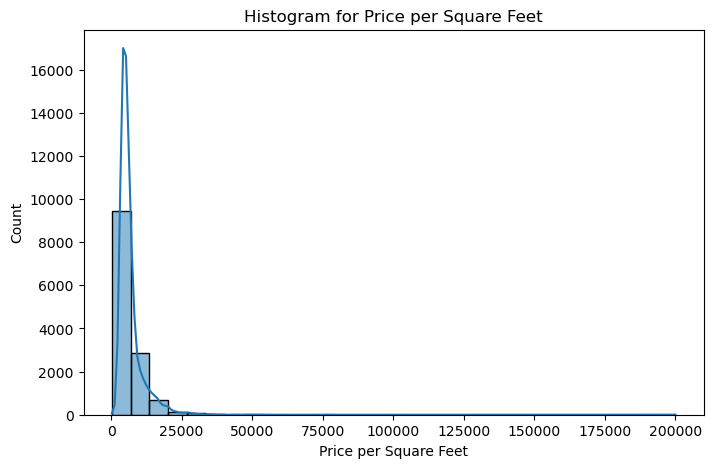

In [32]:
# Plotting the histogram for 'price_per_sqft' column
plt.figure(figsize=(8, 5))
sns.histplot(new_data['price_per_sqft'], bins=30, kde=True)
plt.title('Histogram for Price per Square Feet')
plt.xlabel('Price per Square Feet')
plt.show()

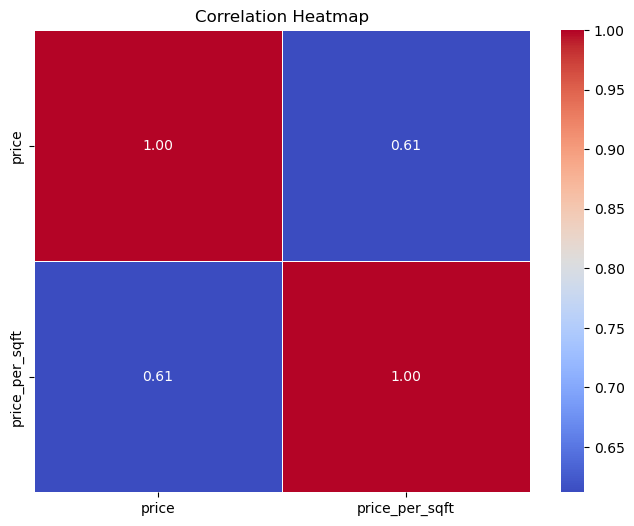

In [38]:
# Calculate the correlation matrix for all numerical columns
correlation_matrix = new_data.drop(['location', 'size', 'total_sqft', 'bath', 'bhk'], axis=1).corr()
# Plot the heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

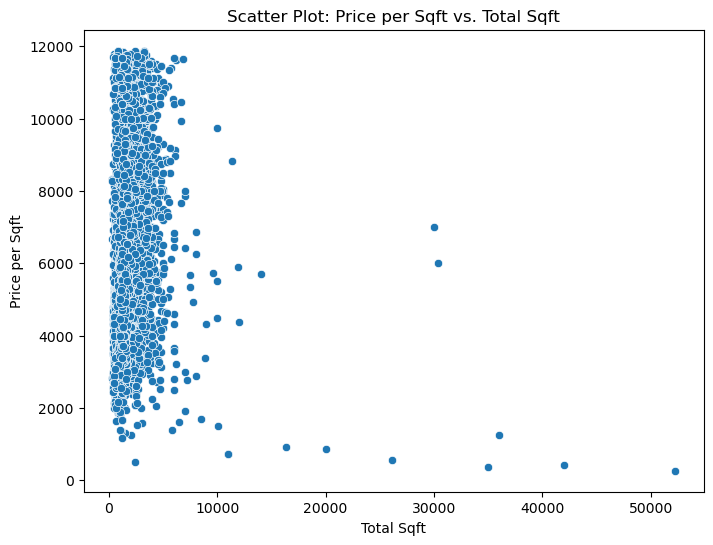

In [40]:
# Scatter plot between 'price_per_sqft' and 'total_sqft'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_sqft', y='price_per_sqft', data=new_data)
plt.title('Scatter Plot: Price per Sqft vs. Total Sqft')
plt.xlabel('Total Sqft')
plt.ylabel('Price per Sqft')
plt.show()

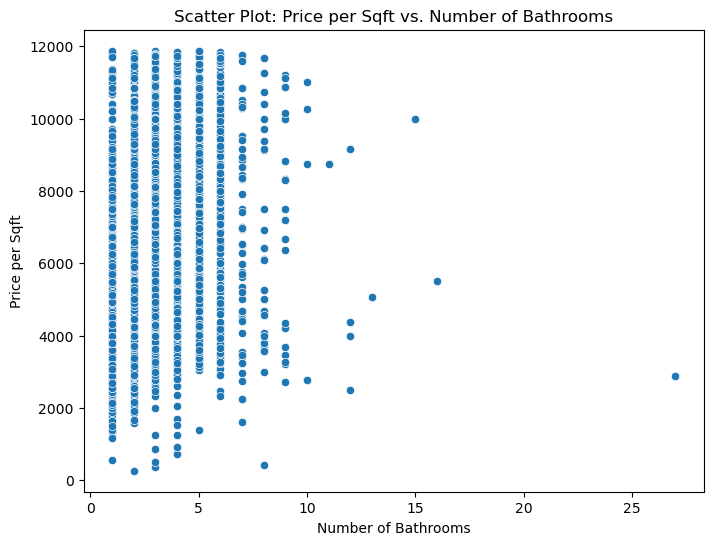

In [41]:
# Scatter plot between 'price_per_sqft' and 'bath'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bath', y='price_per_sqft', data=new_data)
plt.title('Scatter Plot: Price per Sqft vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price per Sqft')
plt.show()

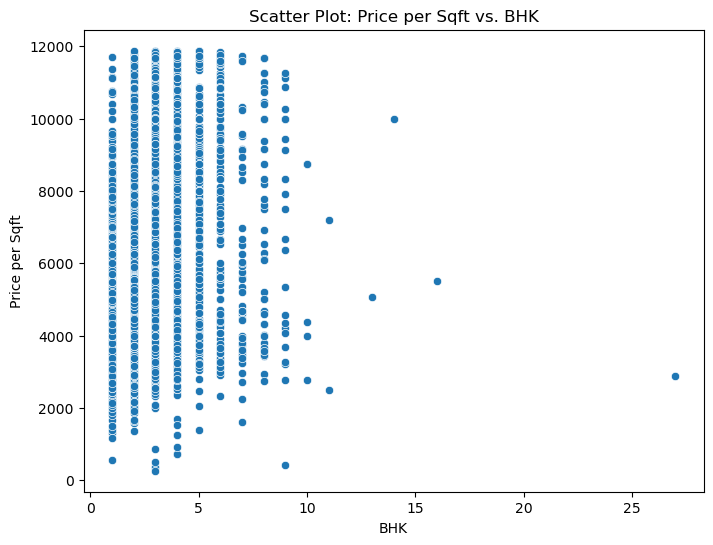

In [42]:
# Scatter plot between 'price_per_sqft' and 'bhk'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bhk', y='price_per_sqft', data=new_data)
plt.title('Scatter Plot: Price per Sqft vs. BHK')
plt.xlabel('BHK')
plt.ylabel('Price per Sqft')
plt.show()